In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [88]:
print(data.size)

4953


In [5]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


In [6]:
X = data.values

In [7]:
X

array([[4.583e+03, 1.280e+02],
       [3.000e+03, 6.600e+01],
       [2.583e+03, 1.200e+02],
       [6.000e+03, 1.410e+02],
       [2.333e+03, 9.500e+01],
       [3.200e+03, 7.000e+01],
       [2.500e+03, 1.090e+02],
       [1.853e+03, 1.140e+02],
       [1.299e+03, 1.700e+01],
       [4.950e+03, 1.250e+02],
       [3.596e+03, 1.000e+02],
       [3.510e+03, 7.600e+01],
       [4.887e+03, 1.330e+02],
       [2.600e+03, 1.150e+02],
       [7.660e+03, 1.040e+02],
       [2.600e+03, 1.160e+02],
       [3.365e+03, 1.120e+02],
       [2.799e+03, 1.220e+02],
       [4.226e+03, 1.100e+02],
       [1.442e+03, 3.500e+01],
       [3.750e+03, 1.200e+02],
       [3.167e+03, 7.400e+01],
       [4.692e+03, 1.060e+02],
       [3.500e+03, 1.140e+02],
       [1.828e+03, 1.000e+02],
       [3.667e+03, 1.440e+02],
       [3.748e+03, 1.100e+02],
       [3.600e+03, 8.000e+01],
       [1.800e+03, 4.700e+01],
       [2.400e+03, 7.500e+01],
       [3.941e+03, 1.340e+02],
       [4.695e+03, 9.600e+01],
       [

In [56]:
def random_centroids(data, k):
    n_samples, n_features = data.shape
    if n_samples < k:
        raise ValueError("Number of clusters (k) is greater than the number of data points.")

    centroids_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[centroids_indices]
    return centroids


In [57]:
centroids=random_centroids(scaled_x,4)

In [58]:
centroids

array([[-0.29186173, -2.43587206],
       [-0.29115649, -1.09412211],
       [-0.12260321,  0.63602914],
       [ 0.19687224,  1.30690412]])

In [59]:
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments


In [60]:
labels=assign_clusters(scaled_x,centroids)

In [61]:
labels

array([3, 1, 2, 3, 1, 1, 2, 2, 0, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 1, 3, 2, 1, 0, 1, 3, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 1, 2,
       3, 2, 1, 2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 2, 3, 1, 3, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       3, 2, 1, 0, 3, 3, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 3, 2,
       2, 2, 1, 3, 1, 2, 3, 3, 3, 2, 0, 2, 3, 2, 2, 1, 3, 2, 3, 2, 3, 3,
       3, 2, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 1, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 1, 2,
       1, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2, 3, 3, 1, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
       2, 3, 3, 1, 1, 3, 2, 1, 3, 1, 1, 3, 2, 2, 2, 0, 3, 3, 2, 2, 1, 3,
       2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 1, 1, 2,

In [62]:
def update_centroids(data, cluster_assignments, n_clusters):
    new_centroids = np.zeros((n_clusters, data.shape[1]))
    for cluster_idx in range(n_clusters):
        cluster_points = data[cluster_assignments == cluster_idx]
        if len(cluster_points) > 0:
            new_centroids[cluster_idx] = np.mean(cluster_points, axis=0)
    return new_centroids


In [63]:
def plot_clusters(data, centroids, cluster_assignments):
    n_clusters = centroids.shape[0]
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Add more colors if needed

    for i in range(n_clusters):
        cluster_points = data[cluster_assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}')

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Cluster Plot')
    plt.show()

In [95]:
def k_means(data, k, max_iterations=100,tol=1e-4):
    centroids = random_centroids(data, k)

    for _ in range(max_iterations):
        prev_centroids = np.copy(centroids)
        print("Centroids and their cluster points in different iterations")
        cluster_assignments = assign_clusters(data, centroids)
        centroids = update_centroids(data, cluster_assignments, k)
        print(centroids)
        print(cluster_assignments)
        # Check for convergence
        if np.allclose(centroids, prev_centroids, rtol=tol):
            break

    return centroids, cluster_assignments

Centroids and their cluster points in different iterations
[[4219.66409266  108.86872587]
 [2058.42222222   93.42222222]
 [2680.3125      106.09375   ]]
[0 0 2 0 1 0 1 1 1 0 0 0 0 2 0 2 0 2 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 2 0
 1 0 0 0 2 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 1 2 0 0 0 0 0 2 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 2 2 0 2 0 0 0 1 1 0 2 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 2 0 0 1 0 2 0 2 0 1
 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 0 0 0 0 1 0 2 1 1 0
 1 1 0 1 0 1 0 0 2 1 0 2 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 2 0 1 0 0 1 1 0 1 2 0 0 0 2 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 2 0 0 0 2 0 0 0 1 0 1 0 0 1 0 2 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 2 1 1
 0 2 0 0 0 0 0 0 0 0 0]
Centroids and their cluster points in different iterations
[[4742.8678160

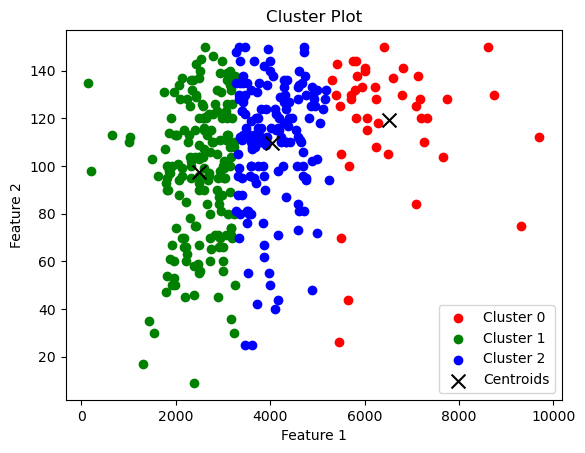

In [96]:

    # Number of clusters
    k = 3

    # Perform k-means clustering
    centroids, cluster_assignments = k_means(X, k)
    print(centroids)
    print(cluster_assignments)

    # Plot the clusters
    plot_clusters(X, centroids, cluster_assignments)